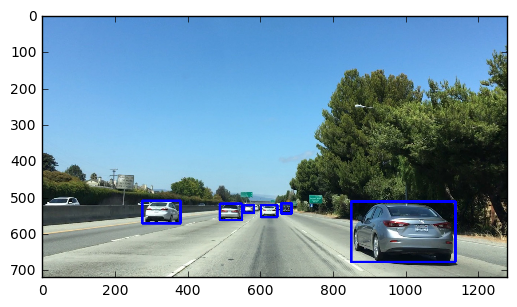

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')

# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    draw_img = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(draw_img, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return draw_img

bboxes = [((275, 572), (380, 510)), ((488, 563), (549, 518)), ((554, 543), (582, 522)), 
          ((601, 555), (646, 522)), ((657, 545), (685, 517)), ((849, 678), (1135, 512))]

result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()

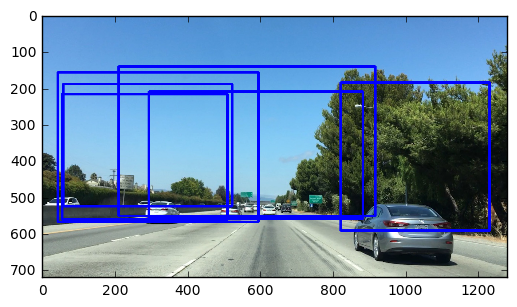

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')
#image = mpimg.imread('temp-matching-example-2.jpg')
templist = ['cutout1.jpg', 'cutout2.jpg', 'cutout3.jpg',
            'cutout4.jpg', 'cutout5.jpg', 'cutout6.jpg']

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
# Define a function to search for template matches
# and return a list of bounding boxes
def find_matches(img, template_list):
    # Define an empty list to take bbox coords
    bbox_list = []
    # Define matching method
    # Other options include: cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCORR',
    #         'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
    method = cv2.TM_CCOEFF_NORMED
    # Iterate through template list
    for temp in template_list:
        # Read in templates one by one
        tmp = mpimg.imread(temp)
        # Use cv2.matchTemplate() to search the image
        result = cv2.matchTemplate(img, tmp, method)
        # Use cv2.minMaxLoc() to extract the location of the best match
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        # Determine a bounding box for the match
        w, h = (tmp.shape[1], tmp.shape[0])
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        # Append bbox position to list
        bbox_list.append((top_left, bottom_right))
        # Return the list of bounding boxes
        
    return bbox_list

bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()

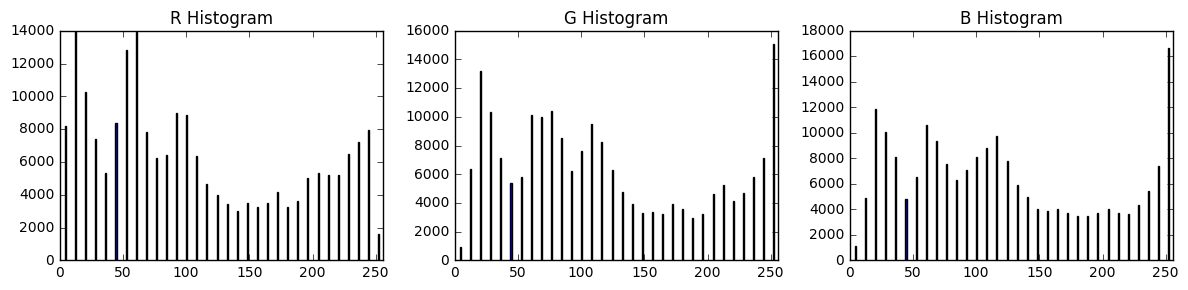

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('cutout1.jpg')

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    

    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
    plt.show()
else:
    print('Your function is returning None for at least one variable...')

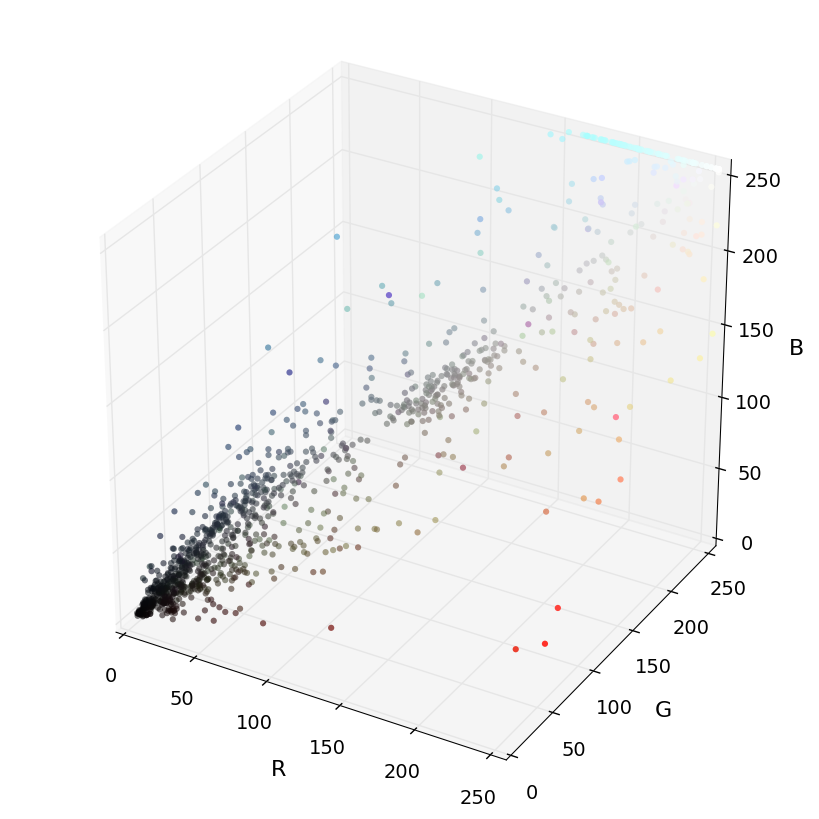

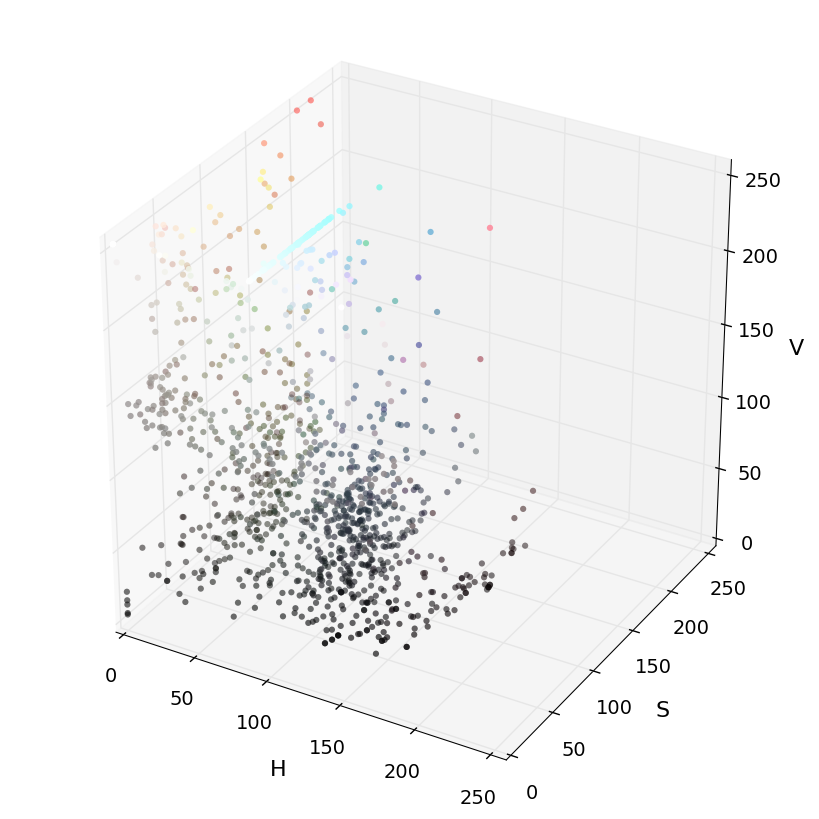

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb, axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation


# Read a color image
img = cv2.imread("000275.png")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

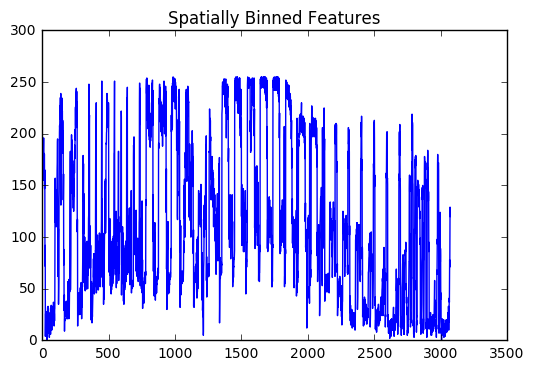

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in an image
# You can also read cutout2, 3, 4 etc. to see other examples
image = mpimg.imread('cutout1.jpg')

# Define a function to compute color histogram features  
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
"""
I mean, this is clearly the vector 1d reshape of the image! really?
"""
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features
    
feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))

# Plot features
plt.plot(feature_vec)
plt.title('Spatially Binned Features')
plt.show()

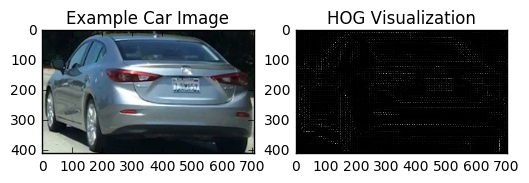

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
from skimage import color, exposure
# images are divided up into vehicles and non-vehicles

images = glob.glob('*.jpg')
cars = []
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=False, feature_vector=feature_vec)
        return features
    
# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.show()

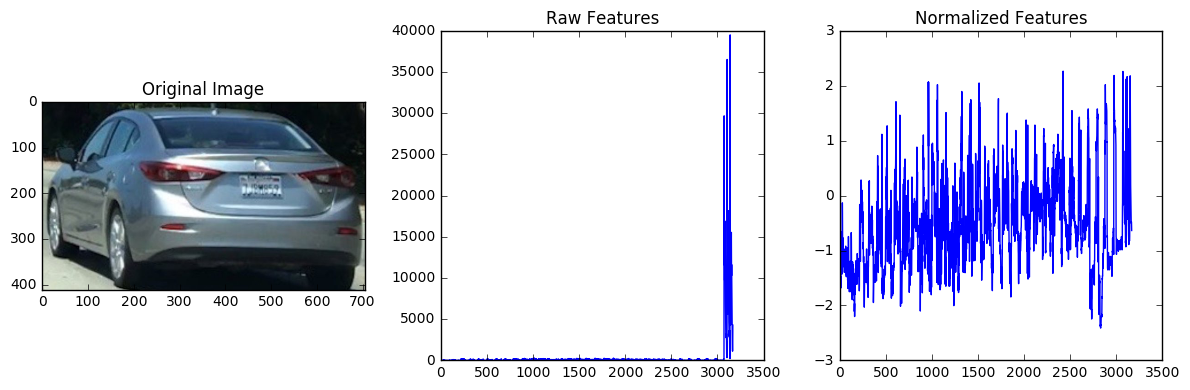

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(image)      
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # Append the new feature vector to the features list
        features.append(np.concatenate((spatial_features, hist_features)))
    # Return list of feature vectors
    return features


images = glob.glob('*.jpg')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
    plt.show()
else: 
    print('Your function only returns empty feature vectors...')

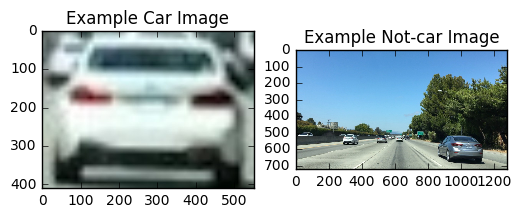

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
#from skimage.feature import hog
#from skimage import color, exposure
# images are divided up into vehicles and non-vehicles

images = glob.glob('*.jpg')
cars = []
notcars = []

for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = 0
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = 0
    # Read in a test image, either car or notcar
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = (0, 0, 0)
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = None
    # Return data_dict
    return data_dict
    
data_info = data_look(cars, notcars)
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')
plt.show()

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from skimage import color, exposure
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        print(features.shape)
        print(features[0,0,0,0,:])
        print(features[0,0,0,1,:])
        print(features[0,0,1,0,:])
        print(features[0,0,1,1,:])
        return features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256), orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: feature_image = np.copy(image)      
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        # Call get_hog_features() with vis=False, feature_vec=True
        hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=False)
        # Append the new feature vector to the features list
        #features.append(np.concatenate((spatial_features, hist_features, hog_features)))
    # Return list of feature vectors
    return None#features


# Divide up into cars and notcars
images = glob.glob('imgs/*.png')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

orient = 9
pix_per_cell = 8
cell_per_block = 2


#car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
#                        hist_bins=32, hist_range=(0, 256))
#notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
#                        hist_bins=32, hist_range=(0, 256))

In [3]:
test = ["cutout1.jpg"]
extract_features(test, 
                 cspace='RGB', 
                 spatial_size=(32, 32),
                 hist_bins=32, 
                 hist_range=(0, 256));

(42, 72, 2, 2, 9)
[ 0.03276198  0.          0.04237787  0.20505445  0.19406179  0.          0.
  0.          0.        ]
[ 0.00786567  0.          0.          0.02420047  0.25997233  0.          0.
  0.          0.        ]
[ 0.00091551  0.0053011   0.00786769  0.01100031  0.08506355  0.00268889
  0.00031355  0.00086778  0.00054855]
[ 0.00044281  0.00222257  0.00116286  0.02288098  0.08961803  0.00180663
  0.00066513  0.          0.00033934]


In [22]:
factor(108864)

NameError: name 'factor' is not defined

In [33]:
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(t2-t, 'Seconds to train SVC...')
# Check the score of the SVC
print('Train Accuracy of SVC = ', svc.score(X_train, y_train))
print('Test Accuracy of SVC = ', svc.score(X_test, y_test))
# Check the prediction time for a single sample
t=time.time()
prediction = svc.predict(X_test[0].reshape(1, -1))
t2 = time.time()
print(t2-t, 'Seconds to predict with SVC')

12.796731948852539 Seconds to train SVC...
Train Accuracy of SVC =  1.0
Test Accuracy of SVC =  0.991045730732
0.0 Seconds to predict with SVC


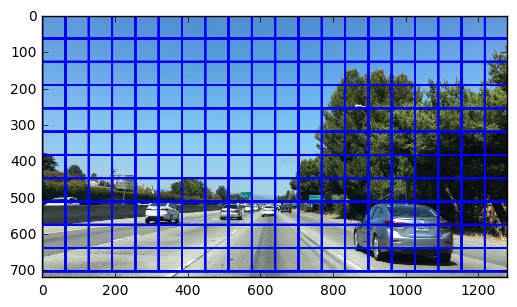

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('bbox-example-image.jpg')

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_windows = np.int(xspan/nx_pix_per_step) - 1
    ny_windows = np.int(yspan/ny_pix_per_step) - 1
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list


windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)
plt.show()

In [ ]:
"""
Ok, so the general plan is to establish a preset resolution, I imagine 64x64
should be enough to train a conv dnn instead of a SVM, though it seems that
SVM could be enough.

Then create the pipeline in order to train the classifier

Then apply the sliding window approach

Then I have to deal with multiclassifications over various windows

Then also deal with false positives
""" 

In [ ]:
"""
First create a custom pipeline to extract all the features, I believe it would be
better to treat the features of HOG as an input to a CNN, but then the spatial 
bining features would need to be treated as a vector, and then I would need to 
use a non sequential keras model... no time for that right now. I suggest then
creating, as the input to the CNN, a

1) simplified HOG image, with 8*8 resolution
... nvm, I am better off with a simple CNN at the low level, with a very small
windows size.  maybe even 3x3 but 5x5 sounds better, that as first state can the
be feed to the classifier, which, we we start this way, can also be all done 
inside a CNN! So, we hope that the first layers of the CNN can effectively
capture the gradients as bins, and then 

... wait, the rubric says we should use HOG, mmm, too bad, ok then

Then for overlap, we can use this http://www.computervisionblog.com/2011/08/blazing-fast-nmsm-from-exemplar-svm.html

2) But in any case, I can use the many hog features in non vector form as input
layers for a CNN, and also the layer of some image transform, and the original
rgb image? maybe, somewhat heavy though! the spatial bining is actually just a
reshape of the reduced imaga! so we may really need a multiple input keras!
and we might need to normalize after flattening, but this might be difficult

But here is an example https://github.com/fchollet/keras/issues/3386 !
And we can use BN

I wont have time to properly fix the issues in the clustering algo, or deploy the
CNN approach, or to properly filter the lanes, so we wont do the optional
challenge... but ok...

So, it looks good, create a multi input keras model, train it, use the color
histograms as one branch, and the hog features as another, and also some reduced
set of RGB + HSV images? maybe, I guess, with 8*8 resolution? 

maybe problem space is too small! Can we even use CNNs? with a 8*8 size?

use the y channel, reshape the output to separate the 2x2blocks, but maybe reshape 
wont work, maybe yes? no, since we cross mem boundaries, so custom reshape, add phantom
0 pixels outside, make maxpool over overlapped blocks and go on...
"""

In [46]:
a = np.arange(32).reshape((2, 2, 2, 2, 2))

In [54]:
b = a.reshape((4, 4, 1, 1, 2), order='C')

In [6]:
# Define all used color spaces
def colorSpace(image, color):
    
    if color == 'bgr_b':
        return image[:,:,0]
    if color == 'bgr_g':
        return image[:,:,1]
    if color == 'bgr_r':
        return image[:,:,2]
    
    if color == 'hls_h':
        hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
        return hls[:,:,0]
    if color == 'hls_l':
        hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
        return hls[:,:,1]
    if color == 'hls_s':
        hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
        return hls[:,:,2]
    
    if color == 'yuv_y':
        yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        return yuv[:,:,0]
    if color == 'yuv_u':
        yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        return yuv[:,:,1]
    if color == 'yuv_v':
        yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        return yuv[:,:,2]
    
    if color == 'gray':
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if color == 'lab_b':
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
        return lab[:,:,2]
    
    return None

In [11]:
# it seems that hog works best on the Y channel, this makes sense according
# o some object recognition papers as well
def hogFeatures(img, 
                color='yuv_y',
                orient=9, 
                pix_per_cell=8):
    
    # Apply image color space transform
    img = colorSpace(img, color)
    
    # Obtain hog feaures of image, cells per block of 2x2 was
    # selected as it is the simplest max pool layout, we will feed
    # the features to a conv branch of a DNN, so we have to make a
    
    # few careful considerations (sizes, pooling, 'alignment'),
    # normalization, color space, etc...
    features = hog(img, 
                   orientations=orient, 
                   pixels_per_cell=(pix_per_cell, pix_per_cell),
                   cells_per_block=(2, 2), 
                   transform_sqrt=True, 
                   visualise=False, 
                   feature_vector=False)
    
    # Now, the issue is that the blocks kind of repeat cells, so we might want
    # to use a maxpool to 'equalize' the image, a way to do this would be to
    # 'unroll' the cells in blocks, and apply a maxpool 2x2, however, we only
    # want the pooling window to act over the 'intersections' of this reshape,
    # it will need to be a custom reshape since we change the mem layout, and
    # we want to add a 0 value exterior to allow this to be easily handled by 
    # the keras maxpool layer instead of doing it myself. This all reflects,
    # quite expressively, the close relation between hog and the first layer of 
    # a conv. neural network, maybe ven more if we allow hog to consider higher
    # order derivatives, and the maxpool application, and so on. 
    
    # features right now must have shape
    # (nx, ny, cx, cy, bin), and since cx=0,1, cy=0,1, we want a reshape as
    # (nx*2, ny*2, 1, 1, bin), but since we want a border (like keras 'valid')
    # (nx*2 + 2, ny*2 + 2, 1, 1, bin)
    # since we change mem layout, we cannot use reshape, so lets do it!
    nx   = features.shape[0]
    ny   = features.shape[1]
    cx   = 2 # assume constant non param
    cy   = 2 # assume constant non param
    bins = features.shape[4]
    
    # I have thought about other dimensions thant 2, but then I would need to
    # 'interleave' the cells into bins, and it would be harder, moreso if the
    # size is odd and so on... basically, looking for repetitions in the 
    # matrix and appending them one by one on the matrix and so on, possible
    # but harder...
    
    nxp = 2 * nx + 2
    nyp = 2 * ny + 2
    
    final_length = nxp * nyp * bins
    linear = np.zeros((final_length), dtype=np.float32)
    matrix = linear.reshape((nxp, nyp, bins))
    
    # populate the matrix with the 'flattened' hog features
    for nxidx in range(nx):
        for nyidy in range(ny):
            # we are at nxidx, nyidy block
            # this hast cx=2, cy=2 dimensions over cells
            # and each cell has bins dim
            # so get this subelement!
            submatrix = features[nxidx, nyidy, :, :, :]
            # prune spurious dims, maybe not needed though
            submatrix = submatrix.reshape((2, 2, bins))
            # assign to greater matrix, consider that we have a 
            # 1 element offset, also that cell dim is constant and two
            matrix[(1 + 2 * nxidx):(3 + 2 * nxidx),
                   (1 + 2 * nyidy):(3 + 2 * nyidy),
                   :] = submatrix
    
    return matrix

In [15]:
def normalizeLayer(layer):
    
    # could be needed
    layerData = np.array(layer)
    
    x_min = (layerData.min())
    x_max = (layerData.max())
    
    # ensure we have 0 bias!
    a     = -0.5
    b     =  0.5
    
    return np.float32( a + ( b - a ) * np.true_divide( ( layerData - x_min ),  ( x_max - x_min ) ) )

In [19]:
# hog fetures are allright, BUT then we need to normalize to 0 as keras would
# prefer that. It is also convenient to do this PER layer, as in batch 
# normalization too
def normalizeHog(volume):
    
    # get dimensions
    nx   = volume.shape[0]
    ny   = volume.shape[1]
    bins = volume.shape[2]
    
    # normalize and unbias each layer
    for bin in range(bins):
        layer = volume[:, :, bin]
        volume[:, :, bin] = normalizeLayer(layer)
        
    return volume

In [21]:
image = mpimg.imread('imgs/1.png')
features = hogFeatures(image)
print(features.shape)
features = normalizeHog(features)
print(features.min())

(16, 16, 9)
-0.5


In [ ]:
# Define a function to return HOG features and visualization
def get_hog_features(img, 
                     orient=9, 
                     pix_per_cell=8, 
                     cell_per_block=2, 
                     vis=False, 
                     feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        print(features[0,0,0,0,:])
        print(features[0,0,0,1,:])
        print(features[0,0,1,0,:])
        print(features[0,0,1,1,:])
        return features